In [1]:
import numpy as np
import pandas as pd
import mrcfile
import cv2
import glob
from matplotlib import pyplot as plt
import math
%matplotlib inline

In [2]:
image = mrcfile.read('FoilHole_3164987_Data_3165659_3165660_20190104_1203-60868.mrc')

In [3]:
mask = cv2.imread('FoilHole_3164987_Data_3165659_3165660_20190104_1203-60868_mask.jpg')

In [4]:
def transform(image):
    i_min = image.min()
    i_max = image.max()

    image = ((image - i_min)/(i_max - i_min)) * 255
    return image.astype(np.uint8)

In [5]:
def plotting(images, captions, cols=2):
    plt.figure(figsize=(20,20))
    for i, image in enumerate(images):
        plt.subplot(1, cols, i + 1)
        plt.grid(False)        
        
        fig = plt.imshow(image, cmap='gray')
        plt.title(captions[i], fontdict= {'fontsize':12}, color = 'black')
        fig.axes.get_xaxis().set_visible(False)
        fig.axes.get_yaxis().set_visible(False)
    plt.show()

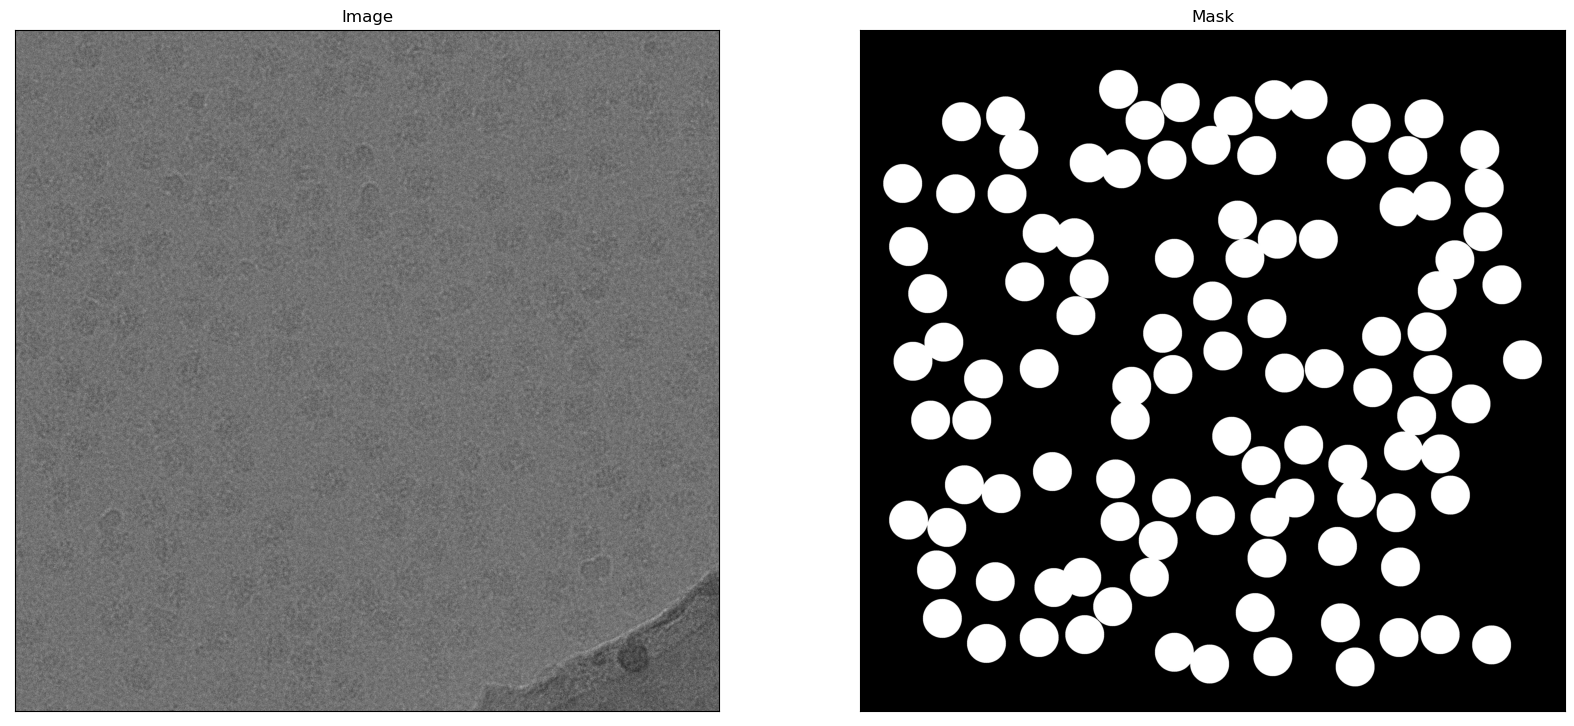

In [6]:
plotting([image, mask], ['Image', 'Mask'])

In [7]:
resized_image = cv2.resize(image, (1024, 1024), interpolation = cv2.INTER_AREA)
resized_mask = cv2.resize(mask, (1024, 1024), interpolation = cv2.INTER_AREA)

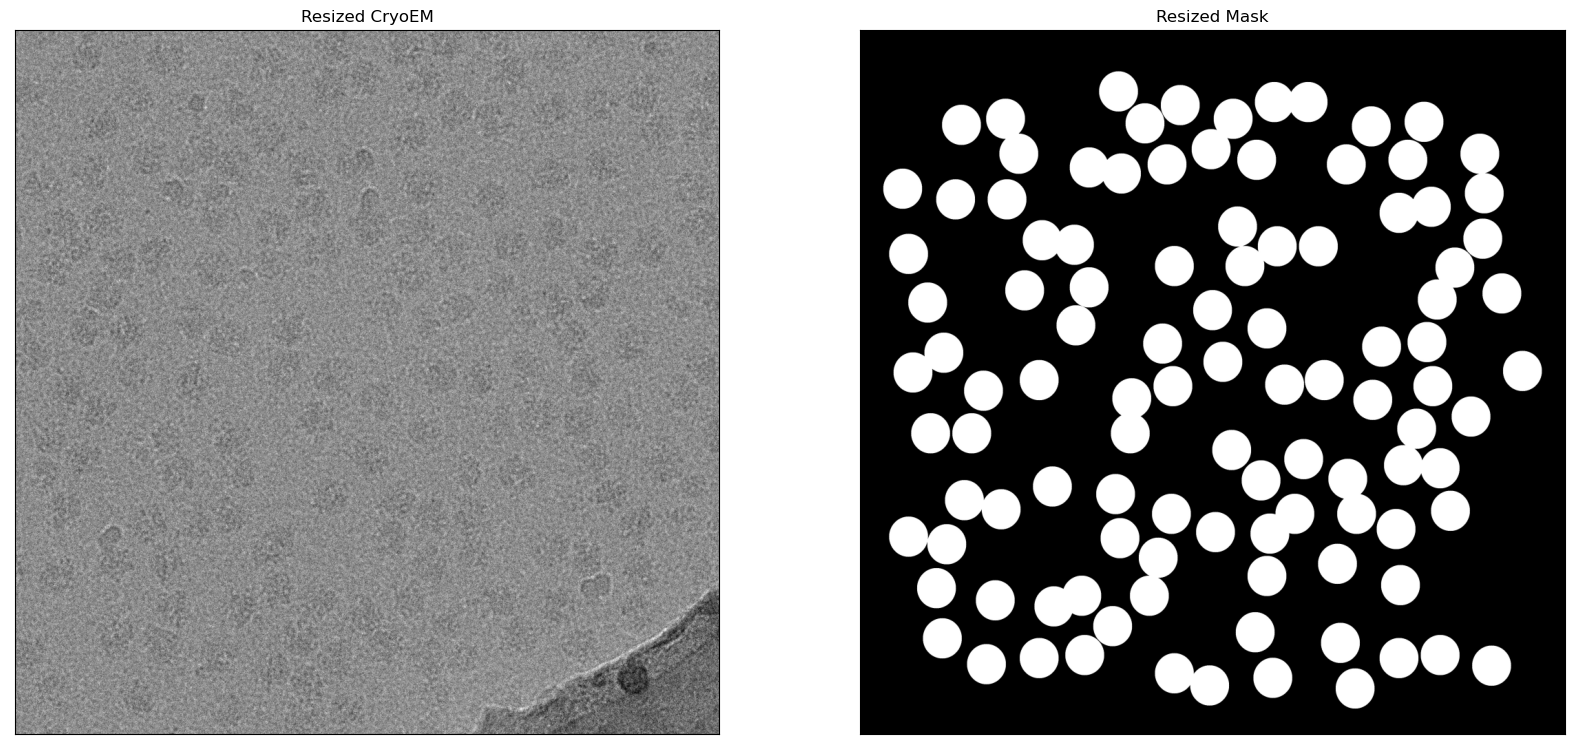

In [8]:
plotting([resized_image, resized_mask], ['Resized CryoEM', 'Resized Mask'])

In [9]:
resized_image.max(), resized_image.min()

(30.694687, 26.289268)

In [10]:
resized_mask.max(), resized_mask.min()

(255, 0)

In [11]:
img = transform(resized_image)
img.max(), img.min()

(255, 0)

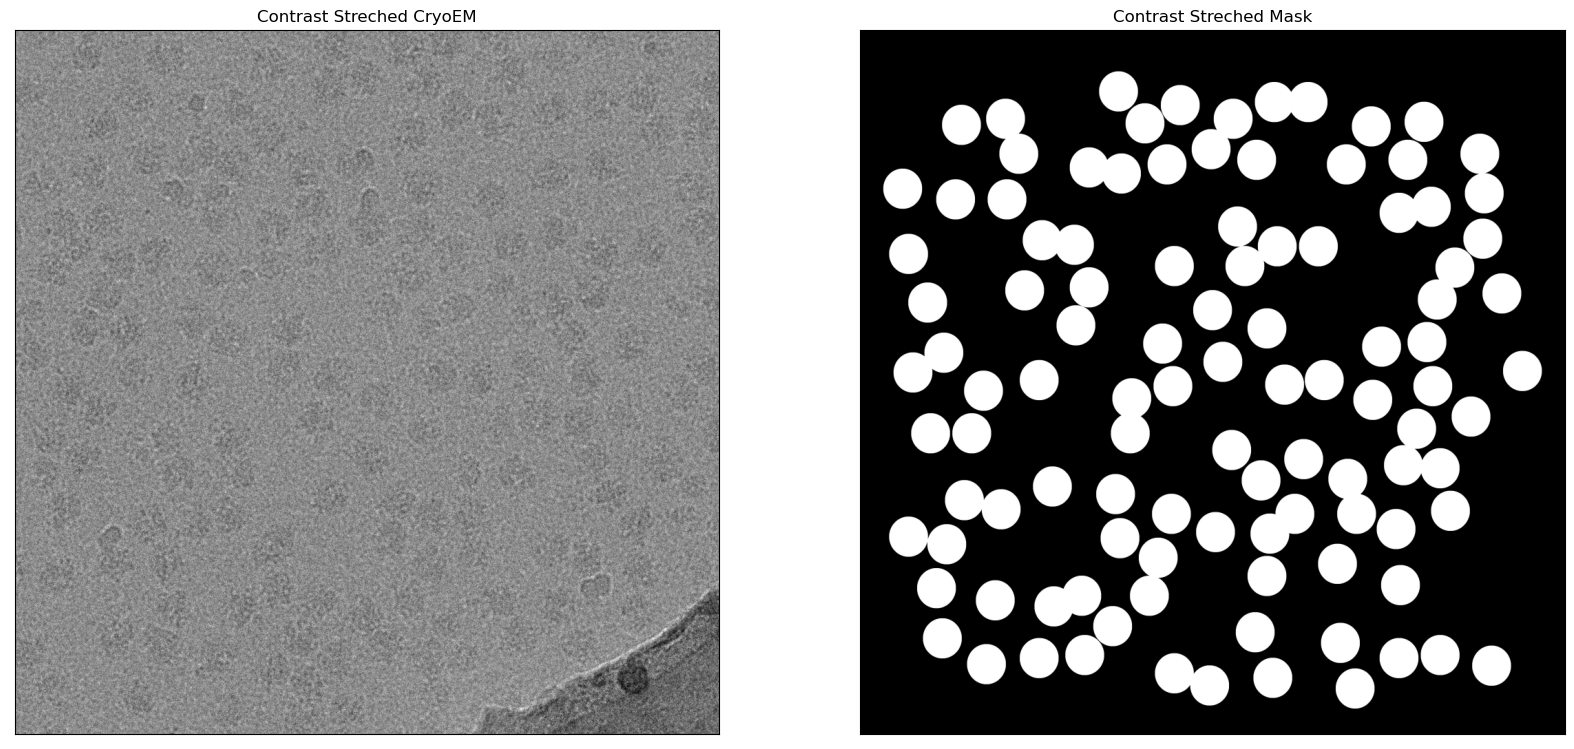

In [12]:
img, msk = img/255.0, resized_mask/255.0
plotting([img, msk], ['Contrast Streched CryoEM', 'Contrast Streched Mask'])

In [13]:
img.max(), img.min()

(1.0, 0.0)

In [14]:
msk.max(), msk.min()

(1.0, 0.0)